<a href="https://colab.research.google.com/github/1900690/draw-image/blob/main/draw_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

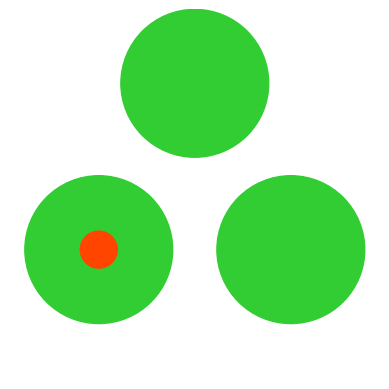

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_shape(white_radius=0.6, green_radius=0.4, brown_size=0.1, brown_x=1, brown_y=1):
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_facecolor('black')  # 背景を黒に設定
    ax.axis('off')

    # 白い円を作成（ベース）
    white_circle = plt.Circle((0, 0), white_radius, color='white', zorder=3)
    ax.add_patch(white_circle)

    # 緑の円（3つ、白い円と重なる部分のみ表示）
    angles = [np.pi / 2, -np.pi / 6, -5 * np.pi / 6]
    for angle in angles:
        x_offset = np.cos(angle) * white_radius
        y_offset = np.sin(angle) * white_radius
        green_circle = plt.Circle((x_offset, y_offset), green_radius, color='limegreen', zorder=4)
        ax.add_patch(green_circle)

    # 茶色の楕円（白の上に描画）
    brown_ellipse = plt.Circle((x_offset, y_offset), brown_size, color='orangered', zorder=5)
    ax.add_patch(brown_ellipse)

    plt.show()
    fig.savefig('output.png', dpi=300)

# デフォルトの設定で描画
draw_shape()


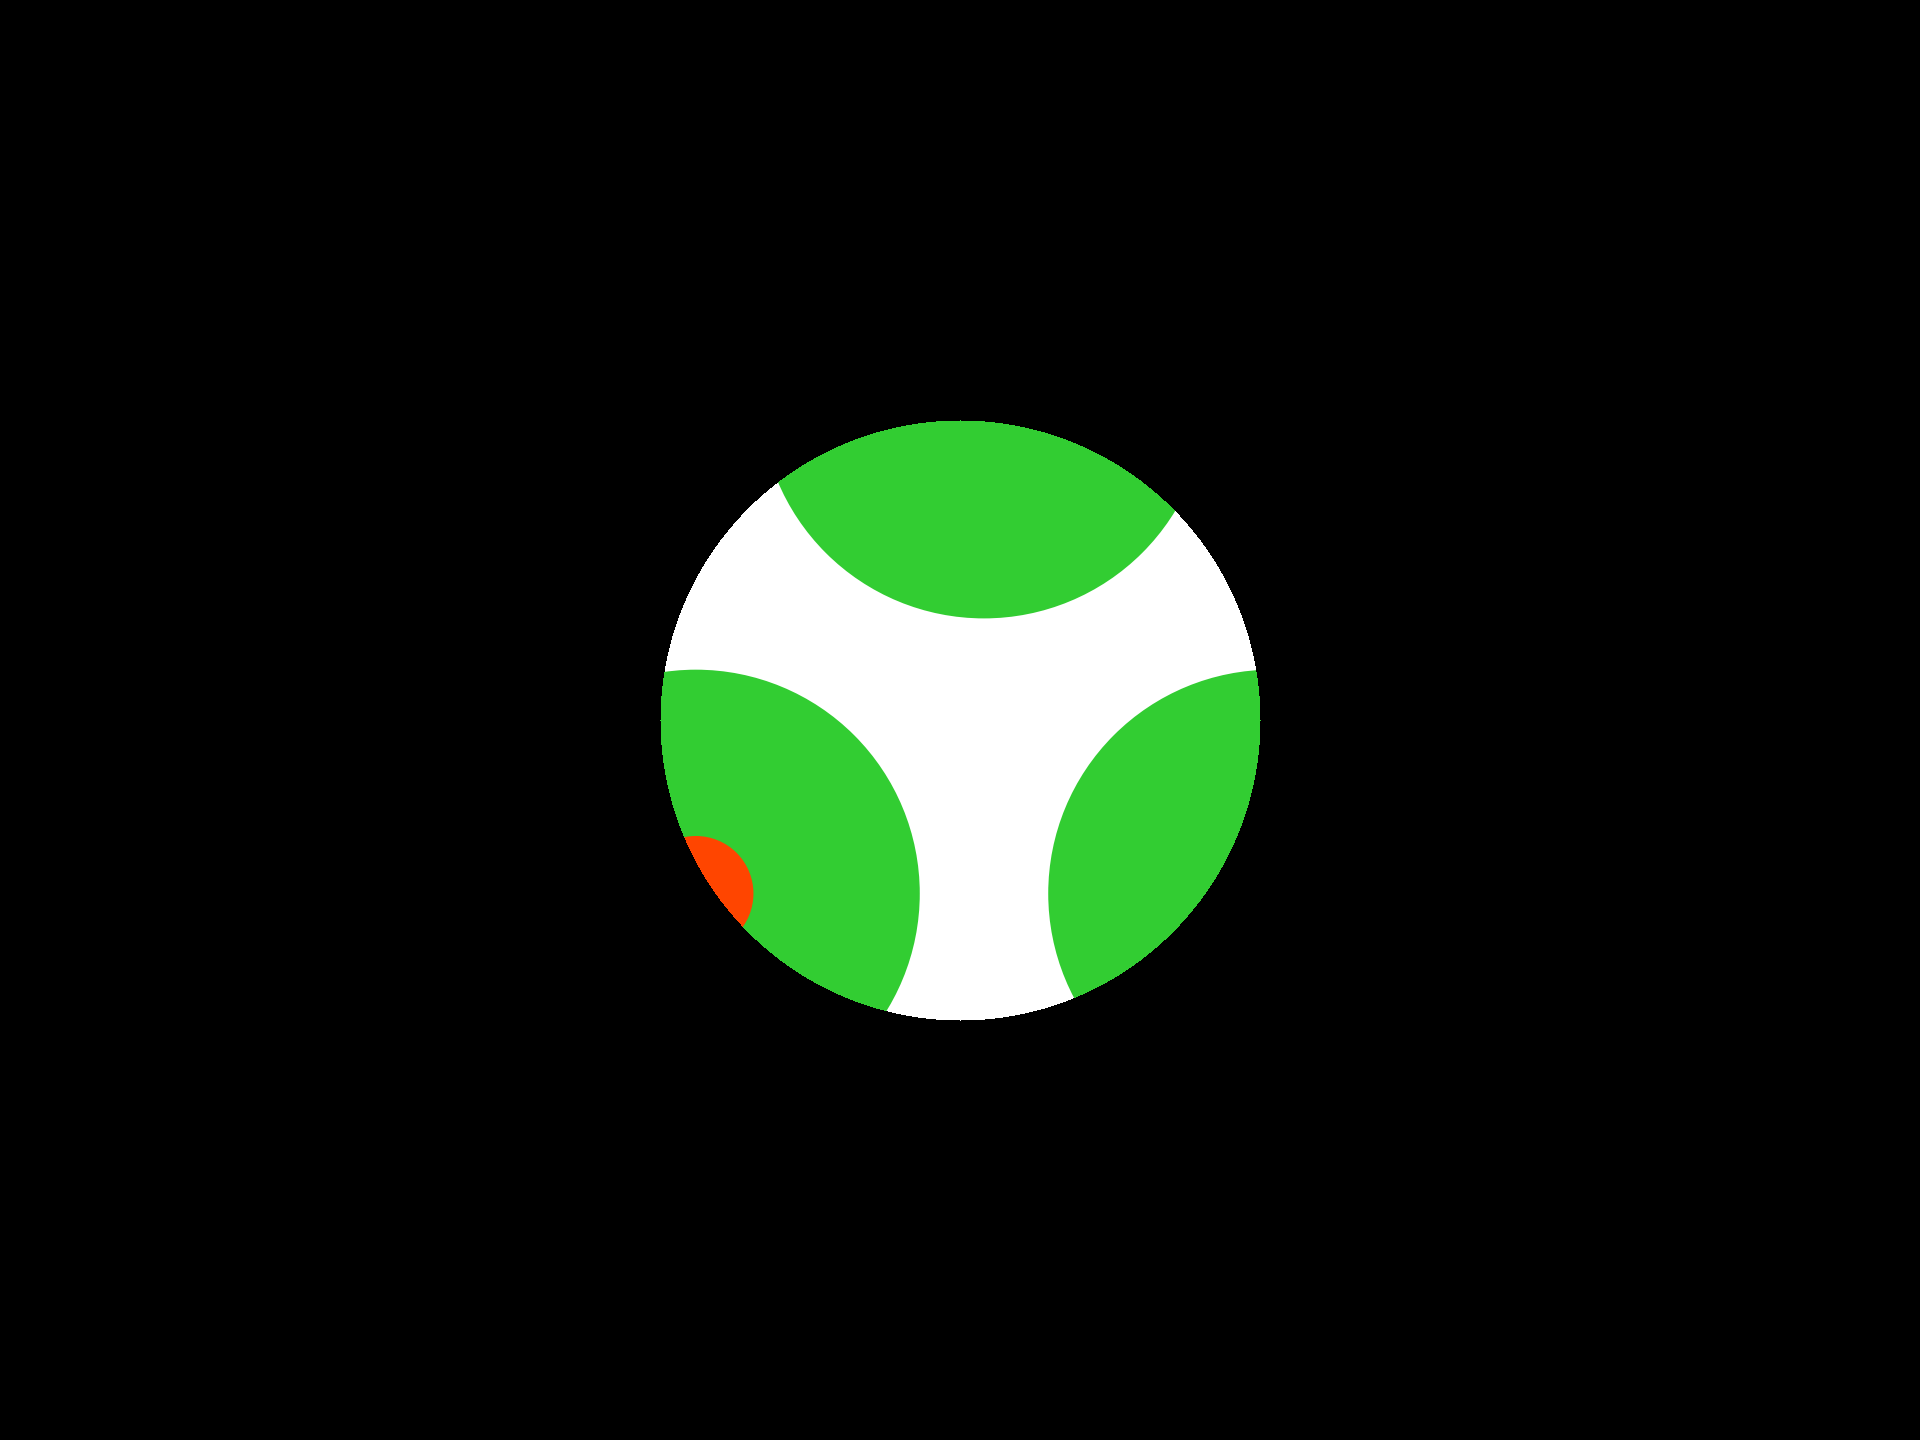

True

In [68]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# マスクをかけたい画像
img = cv2.imread('/content/output.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

# bgr -> rgb
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# マスク画像の生成（マスク画像をかけたい画像サイズと同じ）
mask = np.zeros(rgb.shape, dtype = np.uint8)

# 円形の描画
cv2.circle(mask, (int(width/2),int(height/2)), 300, (255, 255, 255), thickness = -1)

# 画像の合成
rgb_and = cv2.bitwise_and(rgb, mask)

#画像の表示
cv2_imshow(rgb_and)
cv2.imwrite('/content/output2.jpg',rgb_and)